### Instructions

When running the notebook the first time, make sure to run all cells before making changes in the notebook. Hit Shift + Enter to run the selected cell or, in the top menu, click on: `Kernel` > `Restart Kernel and Run All Cells...` to rerun the whole notebook. If you make any changes in a cell, rerun that cell.

If you make any changes in a coding cell, rerun the notebook by `Run` > `Run Selected Cell and All Below`

In [1]:
# Import dependencies
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)      # Ignore warnings
warnings.simplefilter(action='ignore', category=UserWarning)        # Ignore warnings
import sys
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import InterpolatedUnivariateSpline
from IPython.display import Javascript, display, clear_output
from ipywidgets import Output
import IPython
import sys
sys.path.append('python/')                # Define path for libraries
import downloadSPARCdata as dsd           # Import library to download data files
import ipywidgets as widgets              # Run all cells button
from ipylab import JupyterFrontEnd        # Run all cells button

# SPARC Activity

The following notebook will walk you through rotation curve plotting using an online database. As the main activity in this module, select from a list of 175 galaxies to plot their rotation curves and calculate the amount of Dark Matter for all of them! <br>

You will download rotation curve data of galaxies from the Spitzer Photometry & Accurate Rotation Curves (SPARC) database and plot them with and without a Dark Matter component to understand how the "missing mass" affects the rotation of stars. <br>
You may either download and unzip the data files yourself or have Python do the work. 

#### Option 1. Download and unzip the data files yourself:

1. Go to http://astroweb.cwru.edu/SPARC/ and under "BASIC SPARC DATA", download the `Rotmod_LTG.zip` file for "Newtonian Mass Models".
2. Open (extract/unzip) the zip file to preferably the same location as where your Python notebook is located. 
3. Choose a galaxy (any file) of your choice. Do not rename the file. Put the name of the chosen galaxy in the variable in the cell below and run it.
4. Make a note of the directory (file location) of the SPARC file of your galaxy **with respect to this location of this Python notebook**. For example, if your file is located in the same location as this code, leave the following cell as is. But if it is, say, in the next folder "up" from this one, use the extension `../`. As an example, if the SPARC file is located two folders up then one folder "down" (into a different folder named, say, 'otherfolder'), you would write:
`SPARC_file_directory='../../otherfolder/'` in the cell below and run it.

In [2]:
SPARC_file_directory='data/sparc/'                 #note that '' means the string variable is blank

#### Option 2. Let Python download and unzip the data files

1. By clicking the YES button, you can download and unzip SPARC data files to your computer. 

In [3]:
#NBVAL_IGNORE_OUTPUT
#Because the button doesn't save to the repository correctly.
print("Would you like to download and unzip SPARC data files to your computer?")
dsd.displaybuttons

Would you like to download and unzip SPARC data files to your computer?


### Choose a galaxy

Select any galaxy from the dropdown menu.

In [4]:
#NBVAL_IGNORE_OUTPUT
#Because the dropdown doesn't save to the repository correctly.
galaxylist = ['NGC5005']                 # default list of galaxies
out = Output()
def on_change(change):                   # add selected galaxynames to the list
    with out:
        out.clear_output()
        if change['type'] == 'change' and change['name'] == 'value':
            galaxylist.append(change['new'])
            display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
dsd.dropdownmenu.observe(on_change)
display(dsd.galaxyoptions,out)

Box(children=(Box(children=(Label(value='Galaxy: '), Dropdown(index=79, options=('CamB', 'D512-2', 'D564-8', '…

Output()

Once you selected a galaxy, then click on the gold colored `Run all cells below` button below to reveal the rotation curve and the image of the chosen galaxy in the following cells. 

In [5]:
app = JupyterFrontEnd()
def run_all(ev):
    app.commands.execute('notebook:run-all-below')

run_all_button = widgets.Button(description="Run all cells below")
run_all_button.style.button_color = 'gold'
run_all_button.on_click(run_all)
display(run_all_button)

Button(description='Run all cells below', style=ButtonStyle(button_color='gold'))

In [6]:
# Writing the chosen galaxy name in a text file would allow us to use the selection in libraries outside of this notebook
chosengalaxy = galaxylist[-1]              # define the last element of the list as the selected galaxy
textfile = open("python/chosengalaxy.txt", "w")
textfile.write(chosengalaxy)
textfile.close()

The downloaded files are named as "[galaxy name]\_rotmod.dat". In the following code cell, we have defined the file path for you to import the data for your chosen galaxy.

In [7]:
# Define file path for .dat files
SPARC_file = SPARC_file_directory + chosengalaxy + '_rotmod.dat'

# Load the galaxy data
galaxydata = np.loadtxt(SPARC_file)

Now, lets print the header to see what variable each column corresponds to.

In [8]:
# Print header 
for lines in open(SPARC_file, 'r'):
    if lines.startswith('#'):
        print(lines)

# Distance = 16.9 Mpc

# Rad	Vobs	errV	Vgas	Vdisk	Vbul	SBdisk	SBbul		

# kpc	km/s	km/s	km/s	km/s	km/s	L/pc^2	L/pc^2



__Header key__:<br>
>_Rad_: radius or distance from the center of galaxy (in kiloparsec) <br>
>_Vobs_: observed velocity/measured datapoints (in km/s) <br>
>_errV_: uncertainty in the observed velocity (in km/s) <br>
>_Vgas_: velocity of the gas component (in km/s) <br>
>_Vdisk_: velocity of the disk component (in km/s) <br>
>_Vbul_: velocity of the bulge component (in km/s) <br>
>_SBdisk_: surface brightness of the disk component (in Luminosity/$ \rm parsec^2$) <br>
>_SBbul_: surface brightness of the bulge component (in Luminosity/$ \rm parsec^2$)

Split columns into arrays and name them according to the header displayed in the cell above.

In [9]:
# Split columns into arrays
Rad,Vobs,errV,Vgas,Vdisk,Vbul,SBdisk,SBbul = galaxydata.T     

The distance to the galaxy is given in the data file in Megaparsecs (1 Mpc equals about 3.26 million light years). You can define this value in your Python notebook for your reference. 

In [10]:
# Define distance in Mpc
firstline = open(SPARC_file).readline()         # Open the data file
firstline = firstline.split()                   # Split the first line into separate strings
distance = float(firstline[3])                  # Take the 4th value of the first line (counts: 0,1,2,3...)
print("The distance to {} galaxy is {} Mpc.".format(chosengalaxy,distance))

The distance to NGC5005 galaxy is 16.9 Mpc.


Due to the low number of datapoints, the rotation curve might look choppy. In order to smooth it, you can define a polynomial using Scipy's Interpolated Univariate Spline function, then choose your range and number of datapoints (sampling radii) to define the new, more smooth curve of each component. 

In [11]:
# Spline function
def interpd(x,y):
    return InterpolatedUnivariateSpline(x,y,k=3)      # Degree of the smoothing spline: 3

# Bulge
def bulge(r,bpref):
    polynomial = interpd(Rad,bpref*Vbul)              # bpref is the bulge prefactor added to the bulge
    return polynomial(r)

# Disk
def disk(r,dpref):
    polynomial = interpd(Rad,dpref*Vdisk)             # dpref is the disk prefactor added to the disk
    return polynomial(r)

# Gas 
def gas(r):
    polynomial = interpd(Rad,Vgas)                    # Note that the gas doesn't have a prefactor
    return polynomial(r)

### Observed velocity of the chosen galaxy

Plot the observed velocity (measured datapoints) and the error bars on each measurement of the chosen galaxy as a function of radius.

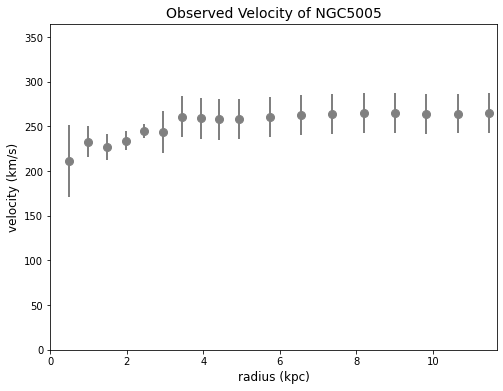

In [12]:
plt.figure(figsize=(8,6))                                                # size of the galaxy
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)  # plot datapoints with errorbars
plt.xlabel('radius (kpc)',size=12)                                       # label x-axis
plt.ylabel('velocity (km/s)',size=12)                                    # label y-axis
plt.title(str('Observed Velocity of ' + chosengalaxy), size=14)          # title of the plot
plt.xlim(0,np.max(Rad)+0.2)                                              # range of the x-axis
plt.ylim(0,np.max(Vobs)+100)                                             # range of the y-axis
plt.show()                                                               # show the plot

A prefactor or mass-to-light ratio ($\Upsilon$) is added to the disk and the bulge which will be useful when fitting the curve of each component. These prefactors help scaling the curve up and down. You can either change these values manually and see the magnitude of the relevant curve change in the cells below or import the fitting parameters from a python library. <br>

>pref_bulge: bulge prefactor<br>
>pref_disk: disk prefactor

Note that the gas prefactor is fixed. The mass of the gas was calculated assuming a factor of 1.33 to account for the contribution of helium. 

In [13]:
import widget_SPARC as fit        # Import widget library for using the fitting parameters
import importlib
importlib.reload(fit)             # Reload widget library so the changes take effect
clear_output()

In [14]:
# Prefactors
pref_bulge = fit.best_bpref
pref_disk = fit.best_dpref

# Radius for plotting
radius = np.linspace(np.min(Rad),np.max(Rad),1000) # starting at the same radius where the given datapoints start, 
                                                   # ending at the same radius where the given datapoints end, 
                                                   # with 1000 datapoints

### Rotational velocity of each luminous component

Plot the rotation velocity of each component.

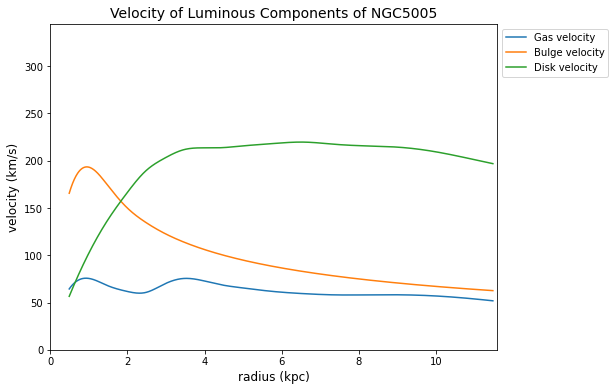

In [15]:
plt.figure(figsize=(8,6))
plt.plot(radius, gas(radius),              label="Gas velocity")
plt.plot(radius, bulge(radius,pref_bulge), label="Bulge velocity")
plt.plot(radius, disk(radius,pref_disk),   label="Disk velocity")
plt.xlabel('radius (kpc)',  size=12)
plt.ylabel('velocity (km/s)', size=12)
plt.title(str('Velocity of Luminous Components of ' + chosengalaxy), size=14)
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(0,np.max(Vobs + 80))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

Each component was calculated using the following model: <br>
>Bulge: residual luminosity profile <br>
>Disk: observed [3.6] surface brightness profile<br>
>Gas: H1 surface density profiles or mass models<br>

However, these calculations are beyond the scope of this workshop. 

### Total velocity curve of luminous matter

Now that we have all of the luminous components or light matter: bulge, disk and gas, we can add them in quadrature with equivalent prefactors to get the total velocity of the luminous matter. 

>__Total velocity of luminous matter__: <br>
    \begin{equation}
    v_{total,light}(r) = \sqrt{\lvert v_{gas}\rvert v_{gas} + \Upsilon _{bulge} \lvert v_{bulge}\rvert v_{bulge} + \Upsilon _{disk} \lvert v_{disk}\rvert v_{disk}}
    \end{equation}<br>

In [16]:
def total_velocity_light(r,pref_bulge,pref_disk):             
    return np.sqrt(gas(r)**2 + bulge(r,pref_bulge)**2 + disk(r,pref_disk)**2)

Plot the luminous components and the total velocity.

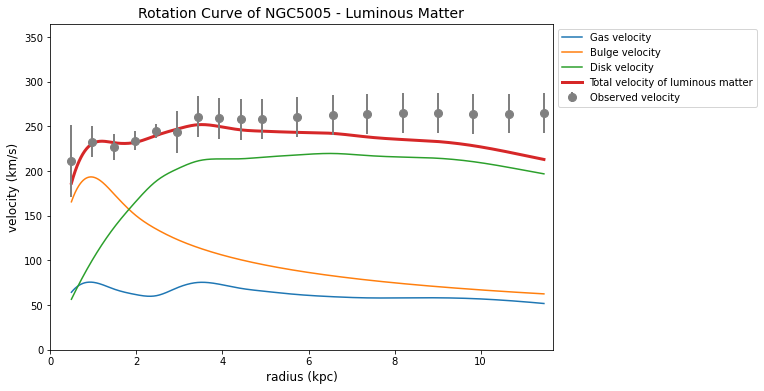

In [17]:
plt.figure(figsize=(9,6))

plt.plot(radius, gas(radius),               label="Gas velocity",   color='#1f77b4')
plt.plot(radius, bulge(radius,pref_bulge),  label="Bulge velocity", color='#ff7f0e')
plt.plot(radius, disk(radius,pref_disk),    label="Disk velocity",  color='#2ca02c')

plt.plot(radius,total_velocity_light(radius,pref_bulge,pref_disk), label="Total velocity of luminous matter", color='#d62728', linewidth=3)
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2, label = "Observed velocity")
plt.xlabel('radius (kpc)',size=12)
plt.ylabel('velocity (km/s)',size=12)
plt.title(str('Rotation Curve of ' + chosengalaxy + ' - Luminous Matter'), size=14)
plt.xlim(0,np.max(Rad + 0.2))
plt.ylim(0,np.max(Vobs) + 100)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

Notice that the total velocity does not align with the measured velocity. Not even if you scale the other components up and down with the prefactor. Let's add the "missing matter".

### Add Dark Matter

Dark Matter can be characterized by two parameters: the central mass density ($\rho_0$) and the core radius ($r_c$). <br>
***Central mass density***: The central mass density is the density at the center of the galaxy, changing this value changes the magnitude of the Dark Matter curve. <br>
***Core radius***: The core radius (also called "cutoff radius" or "scale radius") indicates where the density falls off by a factor of $e$ (~2.7). Adjusting this factor changes where the "bump" of the curve is located.

>__Velocity__: <br>
    \begin{equation}
    v_{DM}(r) = \sqrt{4 \pi G \rho_{0} r_c^2 \big( 1- \frac{r_c}{r} \arctan{\frac{r}{r_c}}\big)}
    \end{equation}<br>
    where:<br>
        $G$ = gravitational constant<br>
        $\rho_0$ = central mass density (in solar mass/$\rm kpc^3$)<br>
        $r_c$ = core radius (in kpc)<br>

Set parameters or import the fitting parameters from our Python library. The fitting parameters were calculated using the Python library: lmfit. 

In [18]:
# Dark matter halo parameters
rho0 = fit.best_rho0     # Central mass density (in solar mass/kpc^3)
rc = fit.best_rc         # Core radius (in kpc)

# Constant parameters
G = 4.300e-6             # Gravitational constant (kpc/solar mass*(km/s)^2)

# Print values
print("The fitted best values for the {} galaxy: ".format(chosengalaxy))
print("    Central mass density of the dark matter halo = {:.3e} solar mass/kpc^3".format(rho0))
print("    Core radius of the Dark Matter halo = {:.3f} kpc".format(rc))

The fitted best values for the NGC5005 galaxy: 
    Central mass density of the dark matter halo = 1.692e+07 solar mass/kpc^3
    Core radius of the Dark Matter halo = 9.917 kpc


In [19]:
# Equation for dark matter halo velocity
def halo(r,rho0,rc):
    v = np.sqrt(4*np.pi*G*rho0*rc**2*(1 - rc/r * np.arctan(r/rc)))
    return v

Now, calculate the total velocity with the Dark Matter component included. 

In [20]:
def total_velocity_withDM(r,pref_bulge,pref_disk,rho0,rc):             
    return np.sqrt(gas(r)**2 + bulge(r,pref_bulge)**2 + disk(r,pref_disk)**2 + halo(r,rho0,rc)**2)

Plot all components and the total velocity with the Dark Matter.

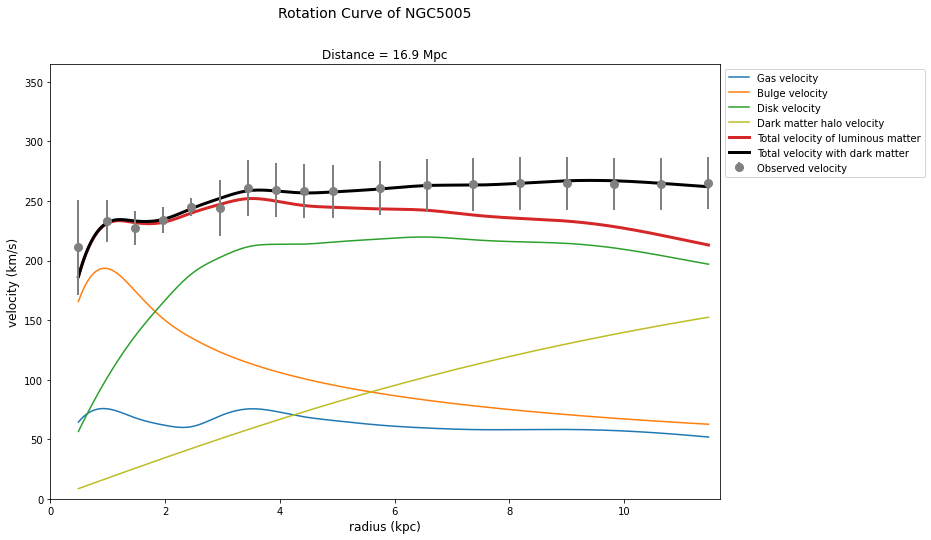

In [21]:
plt.figure(figsize=(12,8))

plt.plot(radius, gas(radius),              label="Gas velocity",   color='#1f77b4')
plt.plot(radius, bulge(radius,pref_bulge), label="Bulge velocity", color='#ff7f0e')
plt.plot(radius, disk(radius,pref_disk),   label="Disk velocity",  color='#2ca02c')
plt.plot(radius, halo(radius,rho0,rc),     label="Dark matter halo velocity",  color='#bcbd22')

plt.plot(radius,total_velocity_light(radius,pref_bulge,pref_disk), label="Total velocity of luminous matter", color='#d62728', linewidth=3)
plt.plot(radius,total_velocity_withDM(radius,pref_bulge,pref_disk,rho0,rc), label="Total velocity with dark matter", color='k', linewidth=3)

plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2, label = "Observed velocity")
plt.xlabel('radius (kpc)',size=12)
plt.ylabel('velocity (km/s)',size=12)
plt.suptitle(str('Rotation Curve of ' + chosengalaxy), size=14)
plt.title(str('Distance = {} Mpc'.format(distance)), size=12)
plt.xlim(0,np.max(Rad + 0.2))
plt.ylim(0,np.max(Vobs) + 100)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

From the plot, we can see that the total velocity curve with dark matter matches the observed data points.

### References

>Jimenez, Raul, Licia Verde, and S. Peng Oh. **Dark halo properties from rotation curves.** _Monthly Notices of the Royal Astronomical Society_ 339, no. 1 (2003): 243-259. https://doi.org/10.1046/j.1365-8711.2003.06165.x. <br><br>
>Lelli, F., McGaugh, S. S., &amp; Schombert, J. M. (2016). **SPARC: Mass models for 175 disk galaxies with Spitzer photometry and accurate rotation curves.** _The Astronomical Journal_, 152(6), 157. https://doi.org/10.3847/0004-6256/152/6/157 <br><br>
>Matt Newville, Renee Otten, Andrew Nelson, Antonino Ingargiola, Till Stensitzki, Dan Allan, Austin Fox, Faustin Carter, Michał, Ray Osborn, Dima Pustakhod, lneuhaus, Sebastian Weigand, Glenn, Christoph Deil, Mark, Allan L. R. Hansen, Gustavo Pasquevich, Leon Foks, … Arun Persaud. (2021). __lmfit/lmfit-py: 1.0.3 (1.0.3).__ Zenodo. https://doi.org/10.5281/zenodo.5570790. <br><br>
>“Megaparsec: Cosmos.” __Megaparsec__ | _COSMOS_. Swinburne University of Technology. Accessed November 12, 2021. https://astronomy.swin.edu.au/cosmos/m/megaparsec. 
***